<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Support Vector Machines</h1></center>

In this notebook, we'll cover one of the major algorithms used in Supervised Learning--**_Support Vector Machines_** (or _SVMs_ for short!). We'll start by playing around with a visual implementation to gain an intuition for how SVMs work, and then we'll grab an SVM implementation from `sklearn` and use to it make some classifcations on a real world data set.  

<center><h3>How Support Vector Machines Work</h3></center>

at first glance, SVMs are similar to other supervised learning algorithms such as Logistic Regression, because the algorithm find the optimal line for a decision boundary.  However, unlike Logistic Regression, SVMs don't just find a line for the decision boundary--they try to maximize the margin between the two sides. 

<center><img src='img/svm_boundary.png' height=40% width=40%></center>

The points that touch the sides of the margin are called **_support vectors_**.  By maximizing the margin by finding support vectors, this has the effect of "balancing" the the decision boundary so that it evenly splits the area between the two classes.  This is not always the case with Logistic Regression--see the image below for a visual example.  

<center><img src="img/svm_vs_lr.png"></center>

Notice that on the image on the right, the line is a bit skewed through the datapoints.  This is a problem that can occur with Logistic Regression, since it's job is to fit a line that linearly separates the two classes. The line in the image on the right _technically_ accomplishes this task, but we can see by looking at the decision boundary that this is not optimal. Contrast this with the decision boundary on the left, which splits the area between the two classes perfectly.  

<center><h3>Linear Separability and Kernel Methods</h3></center>

SVMs are not perfect, however--they only work when the data is **_linearly separable_**--that is, the decision boundary is linear, and can be drawn as a straight line.  Take a look at the picture below, and consider where you would draw the ideal decision boundary to split the two--remember, it has to be a straight line!

<center><img src='img/before_kernel.png' height=50% width=50%></center>

The data is non linearly separable, so we can't draw a decision boundary--or can we?  This is where the cool part of SVMs comes in--what if we mapped the data to a **_higher-dimension space_**--maybe we could draw a decision boundary there?

<center><img src='img/after_kernel.png'></center>

Ah, there it is! In this higher dimensional space, we can see an easy place to draw a linear decision boundary.  It's important to note that in 2 dimensions, our decision boundary looks like a straight line--but for this data, in its current form, our decision boundary will need to look like a piece of paper (with no thickness). This is because our decision boundary will always have one less dimension than the data we are trying to find a decision boundary for.  If our data has 4 dimensions (which we can't visualize), then our decision boundary would be a **_hyperplane_** that would look like a rectangle.  We can generalize this rule to say that for any dataset with \[n\] dimensions, our decision boundary will have \[n - 1\] dimensions. 

The process of mapping data to a higher-dimensional space is called the **_Kernel Method_**.  There are several different kernels that are typically used, but the most common ones you'll typically need to know are the **_Polynomial Kernel_** and the **_Radial Basis Function (RBF)_**--these are complicated data transformations that any ML library worth its salt can handle for you. You don't need to know the math behind them, but you should definitely be aware that they exist, and that they are tools in your ML toolbox for SVMs!

<center>The Final Step</center>

Let's review what we've done so far:

1.  Determined that the data is not linearly separable in its current form.
2.  Mapped the data to a higher dimensional space using a kernel method.
3.  Found a linear decision boundary in the higher dimensional space. 

Now what?

Now that we've identified support vectors that allow us to linearly separate the data in a higher dimensional space, all that we need to do is to bring the data (and the decision boundary) back to our original, lower-dimensional space.  If we visualize the decision boundary for our data in the lower-dimensional space, it will appear as a circle:

<center><img src='img/kernel_with_boundary.png'></center>

It's important to understand that although our decision boundary isn't linear in this lower-dimensional space, that's okay--we found a linear decision boundary in a higher-dimensional space and made our classifications, so we didn't actually break the rules of Support Vector Machines.  

<center><h3>Playing Around with SVMs</h3></center>

To make learning how SVMs work a bit easier, the `sklearn` community has built an awesome interactive visualization that lets users plot points and fit an SVM for binary classification. We **_highly recommend_** running this python script and getting a feel for how SVMs work--plot different data points and see how the decision boundary changes, try different kernel methods, visualize the decision surface of the SVM, etc.  You'll find all of these activities very useful, and very interesting.  

Check out [this link](http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html#sphx-glr-auto-examples-applications-svm-gui-py) to see the page on sklearn.org that gives an example of how everything works. **_To download the file, download and run the python script linked at the bottom of the page (use the script version, not the jupyter notebook!)_**


<center><h2>Challenge: Classifications with SVMs</h2></center>

For the remainder of this notebook, you'll use everything you've learned in DS2 to use a Support Vector Classifier on the [Wisconsin Breast Cancer Dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).  Note that you **_do not need to download the dataset_**, as it comes preloaded as a sample in sklearn.  To get the data, just use the `load_breast_cancer()` method found within `sklearn.datasets`.

**_Challenge_**:

1.  Import and explore the dataset.  Recall the `load_breast_cancer()` method will return an object that contains the data in `.data`, the labels in `.target`, and the column names in `.feature_names` attributes.  
2.  Build a **_Correlation Heatmap_** using **_Seaborn_** to check for each feature's correlation with the labels. 
3.  Build a second **_Correlation Heatmap_** using **_Seaborn_** to check for **_mutlicollinearity_** between features.  
4.  Scale and transform the data using a `StandardScaler()` object and any appropriate methods it contains.
5.  Split the newly scaled data into training and testing sets using `train_test_split()`.
6.  Create an `SVC()` object, which can be found in `sklearn.svm`
7.  Fit the model to the scaled data. 
8.  Use your validation data to check the accuracy metrics for your model.  


**_Stretch Challenge_**: 

1. Try different parameters such as different kernels to see how it affects the overall performance of the model.  For a full list of the tunable parameters you can use with an SVC, see [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on sklearn.org. 

# 1 - Fixing Up the Data

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
# a look at the properties of the dataset
print(breast_cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
# the 'DESCR' will give us a description
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [4]:
'''
How do we know which class is represented by 0? By 1?
I check by looking at the number of 0's and 1's, and cross-comparing with the amounts given for the classes in 
the dataset description.
'''

print(f"Number of 1's: {len([value for value in breast_cancer.target if value == 1])}")  # this is same as Benign
print(f"Number of 0's: {len([value for value in breast_cancer.target if value == 0])}")  # this is same as Malignant

Number of 1's: 357
Number of 0's: 212


In [5]:
# quick look at the data values
print(breast_cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
# Dimensions of the dataset
print(breast_cancer.data.shape)

(569, 30)


In [7]:
# Making a DataFrame object
import pandas as pd

cancer = pd.DataFrame(breast_cancer.data)
cancer.columns = breast_cancer.feature_names
target_var = 'Is_Benign'  # 1 means True (or positive), and 0 is malignancy
cancer[target_var] = breast_cancer.target

In [8]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Is_Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2 - Exploratory Data Analysis

## What percentage of tumors were classified as benign in this study? As malignant?

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

'''
We know from the description of the dataset above that in this study,
that out of 569 total samples,
there were 212 classifications made for malignant, and
357 classifications made for benign tumors.
'''
per_mal = round(212/len(cancer) * 100, 4)
per_ben = round(357/len(cancer) * 100, 4)
print(f'Percentage of Tumors as Benign: {per_ben}%')
print(f'Percentage of Tumors as Malignant: {per_mal}%')


Percentage of Tumors as Benign: 62.7417%
Percentage of Tumors as Malignant: 37.2583%


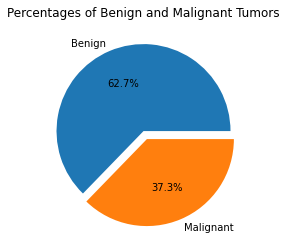

In [10]:
# Visualized Using a Pie Chart

labels = ['Benign', 'Malignant']
population_sizes = [357, 212]
explode = (0.0, 0.1)  # only explode the malignant class

plt.pie(population_sizes, explode=explode, labels=labels, autopct='%1.1f%%',)
plt.title('Percentages of Benign and Malignant Tumors')
plt.show()

### Interesting! 
So it looks as if roughly 2/3 of the data samples in this study came from benign breast cancer tumors. This may be relevant to us later - while still a minority in the dataset population, the rate of malignant tumors in this study is much greater than the incidence rate for breast cancer in 1995, for the total U.S. population.

### Breast Cancer in 1995:
Unfortunately it's difficult to compare how breast cancer has changed over time, once you go before the 21st century. According to a [paper published in "A Cancer Journal for Physicians"](https://acsjournals.onlinelibrary.wiley.com/doi/pdf/10.3322/canjclin.45.1.8), in 1995 there was "no nationwide cancer registry"
like today - therefore we have no exact number for the new cases of cancer that were diagnosed in the United States during that year.

## Overlaying Distribution of Both Classes 

### Mean Area of the Tumor
It seems obvious that one of the features of this dataset, the area of the tumor, will be represented higher in the population of malignant tumors than in that of the benign tumor population.

Is this true? Time to verify:

In [11]:
def get_population_subset(df, population_class):
    """Returns a slice of the DataFrame such that it contains all rows only for the malignant subset of the
       population, or
       the benign subset of the population.
       
       Parameters:
       df(pandas.DataFrame): stores the Wisconsin Breast Cancer Dataset
       population_class(int): 0 for malignant subset, 1 for the benign subset
       
       Returns: pandas.DataFrame
       
    """
    return df[df['Is_Benign'] == population_class]

def get_feature_mean_(df, feature, population_class=None):
    '''Calculates the average value for a feature, amongst one of the two classes.'''
    if population_class is not None:
        # calculate the mean for one of the attributes, for only malignant samples or only benign
        pop_subset = get_population_subset(df, population_class)
    else:
        # calculate the mean for one of the attributes, the whole population
        pop_subset = df
    avg = round(pop_subset[feature].mean(), 4)
    return avg


In [12]:
mal_area_mean = get_feature_mean_(cancer, 'mean area', 0)
print(f'The mean area amongst the samples classified as malignant is: {mal_area_mean} square cm.')

The mean area amongst the samples classified as malignant is: 978.3764 square cm.


In [13]:
ben_area_mean = get_feature_mean_(cancer, 'mean area', 1)
print(f'The mean area amongst the samples classified as benign is: {ben_area_mean} square cm.')

The mean area amongst the samples classified as benign is: 462.7902 square cm.


In [14]:
# Visualized using Overlayed Histograms

# separate the two subpopulations
malignant = get_population_subset(cancer, 0)
benign = get_population_subset(cancer, 0)

# overlay histograms for both population's mean area
mal_area, ben_area = malignant['mean area'], benign['mean area']

In [15]:
# Calculate evenly spaced bins for each population
import numpy as np
mal_bins = np.linspace(mal_area.min(), mal_area.max())  # calculates a number of bins for even spacing
ben_bins = np.linspace(ben_area.min(), ben_area.max())

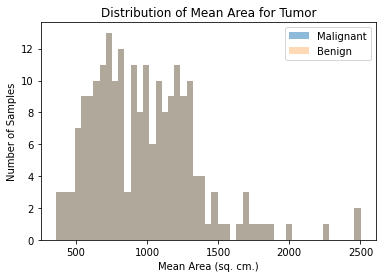

In [16]:
# Visualize Using Matplotlib
plt.hist(mal_area, alpha=0.5, bins=mal_bins, label='Malignant')
plt.hist(ben_area, alpha=0.3, bins=ben_bins, label='Benign')
plt.ylabel('Number of Samples')
plt.xlabel('Mean Area (sq. cm.)')
plt.title("Distribution of Mean Area for Tumor")
plt.legend(loc='upper right')
plt.show()

## Didn't see that coming...
It appears as though the distribution for mean area doesn't change in this dataset, based on whether or not the tumor is malignant or benign. The two histograms perfectly overlap each other!

# 3 - Correlation Heatmaps
## What variables are *actually* impacting the classification the most?

### Feature Correlations to the Labels

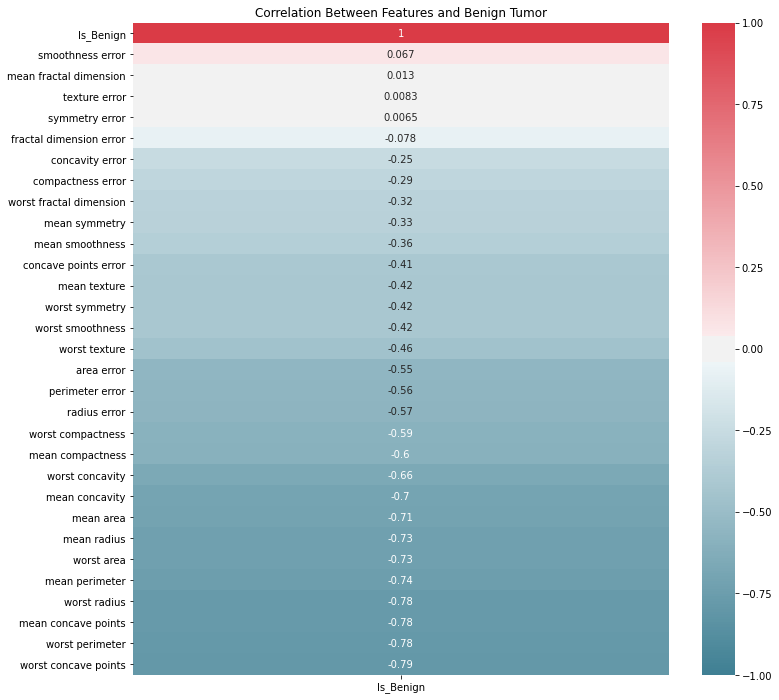

In [17]:
import seaborn as sns

corr = cancer.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Credit goes to Chris Shaw for inspiring the following function call.
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
plt.figure(figsize=(12,12))
plt.title('Correlation Between Features and Benign Tumor')
sns.heatmap(corr[['Is_Benign']].sort_values(by=['Is_Benign'],
            ascending=False), vmin=-1, cmap=cmap, annot=True)
plt.show()

### Multicolinearities Between the Features

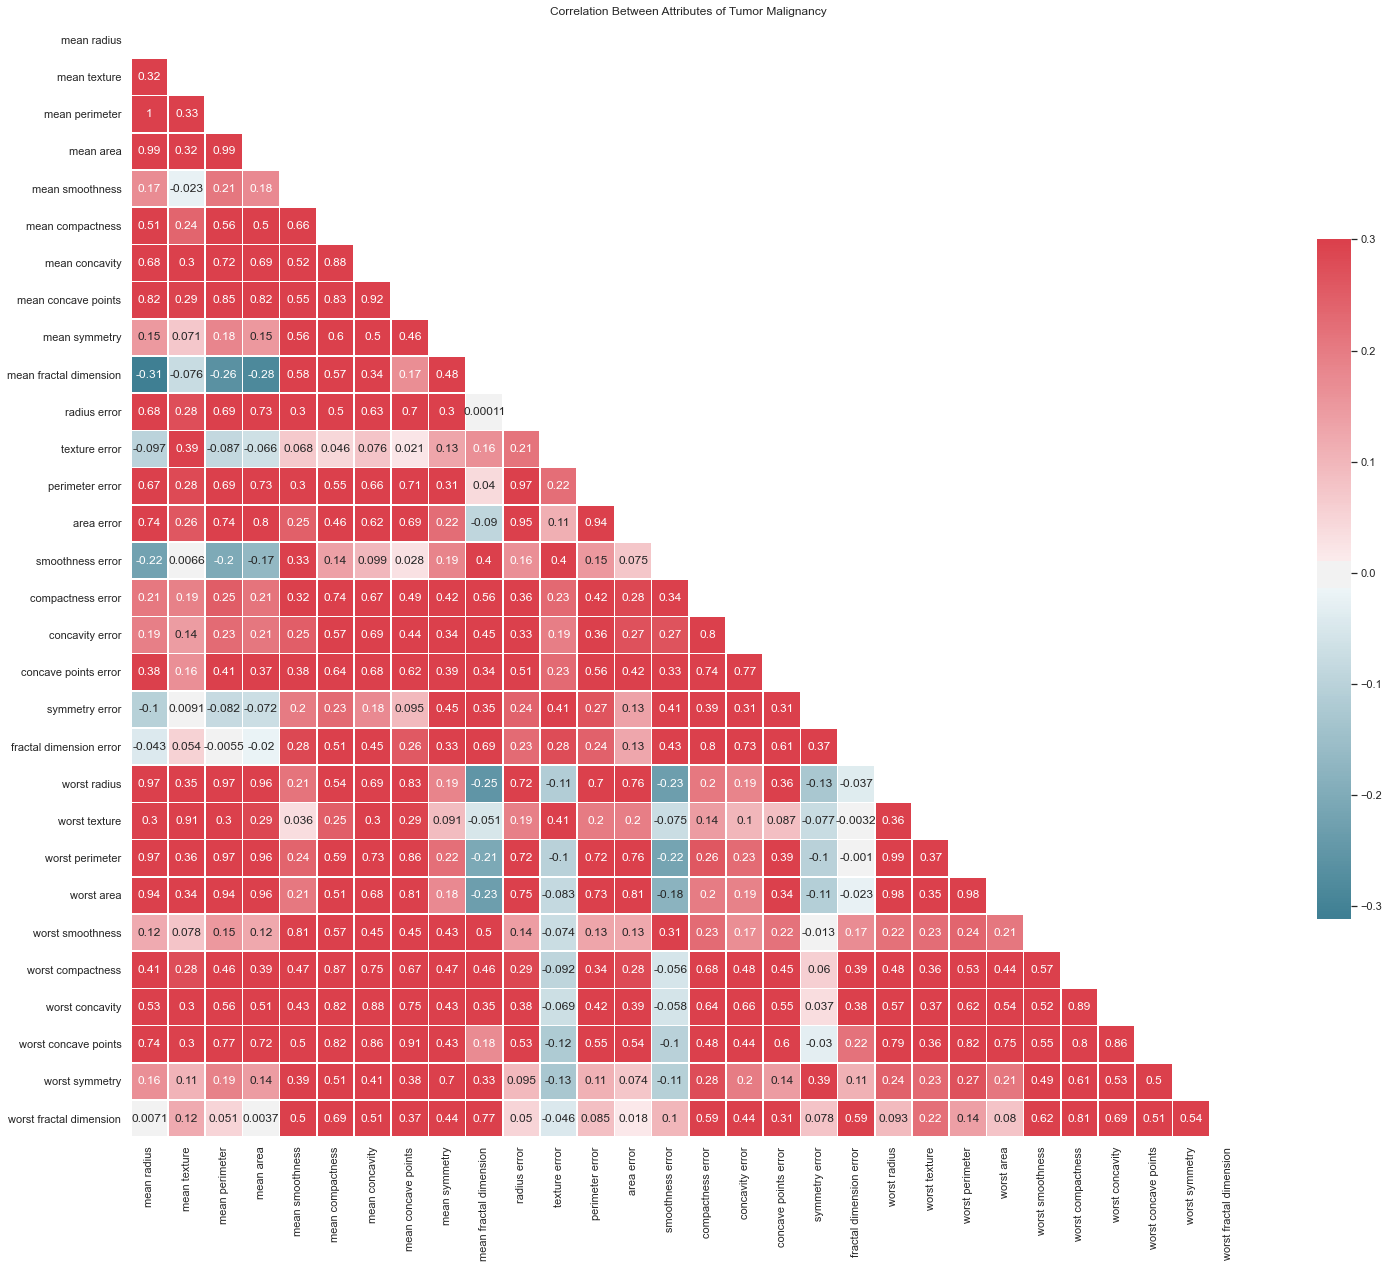

In [22]:
def make_multicolinear_heatmap(df, map_title):
    """Plots the diagonal correlation matrix of a dataset using Seaborn.
       Credit to the Seaborn Documentation for inspiring this cell:
       https://seaborn.pydata.org/examples/many_pairwise_correlations.html
       
       Parameters:
       df(pandas.DataFrame): encapsulates the dataset being used to make heatmap.
       map_title(str): the title for the heatmap
    
    """
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 25))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.title(map_title)
    plt.show()
    
# show this heatmap without the labels variable - if I wanted all instead, then cancer would be passed in as is
cols = list(cancer.columns)
cols.remove('Is_Benign')
cancer_no_target = cancer[cols]
# display heatmap
make_multicolinear_heatmap(cancer_no_target, 'Correlation Between Attributes of Tumor Malignancy')

# 4 - Preparing the Data for SVM

## Splitting into Training and Testing

In [26]:
from sklearn.preprocessing import StandardScaler  # imports the class to do standard scaling
from sklearn.model_selection import train_test_split  # function needed to split our data

def split_scale_data(df, data, scaler, target_var):
    """Scales the specified features of the dataset, using the scaler. 
       Returns DataFrame and data needed to make SVM model.
    
    """
    # split the data
    X = df[data.feature_names]
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test

# remake the DataFrame, with scaled training and testing data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = split_scale_data(cancer, breast_cancer, scaler, 'Is_Benign')

## Applying Standard Scaling

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5 - Making the Model

## Instantiating the Support Vector Machine (Classifier)

In [28]:
from sklearn.svm import SVC

breast_model = SVC(kernel="linear", C=1.0, gamma="auto")

## Training the Model

In [29]:
breast_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 6 - Evaluating the Model

## Making Predictions on the Testing Data

In [30]:
y_pred = breast_model.predict(X_test_scaled)
print(y_pred)  # making sure that it stored 0's and 1's

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


## Comparing to the Actual Values
### These metrics give us a better idea about the accuracy!

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

### R^2 Score

In [32]:
round(r2_score(y_test, y_pred), 4)

0.8801

### Mean Squared Error

In [33]:
round(mean_squared_error(y_test, y_pred), 4)

0.028

### Confusion Matrix

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')

Confusion Matrix: 
[[51  2]
 [ 2 88]]


#### Further Metrics Derived from Confusion Matrix
Formulas found on the [confusion matrix Wikipedia page](https://en.wikipedia.org/wiki/Confusion_matrix).

In [58]:
def calculate_rate(numerator, denominator):
        '''Return the percent value for a statistical formula.'''
        return round(numerator/denominator, 4) * 100

def print_confusion_metrics(cm):
    '''Prints metrics of the model, derived from the confusion matrix.'''
    TN, FP, FN, TP = cm.ravel()

    print('CONFUSION MATRIX METRICS')
    print(f'Hit Rate: {calculate_rate(TP, TP + FN)}%')
    print(f'Selectivity: {calculate_rate(TN, TN + FP)}%')
    print(f'Precision: {calculate_rate(TP, TP + FP)}%')
    print(f'Negative Predictive Value: {calculate_rate(TN, TN + FN)}%')
    print(f'Miss Rate: {calculate_rate(FN, TP + FN)}%')
    print(f'Fall-Out Rate: {calculate_rate(FP, TN + FP)}%')
    print(f'False Discovery Rate: {calculate_rate(FP, TP + FP)}%')
    print(f'False Omission Rate: {calculate_rate(FN, FN + TN)}%')
    print(f'Threat Score: {calculate_rate(TP, TP + FN + FP)}%')
    print(f'Accuracy: {calculate_rate(TP + TN, TP + TN + FP + FN)}%')
    
print_confusion_metrics(cm)

CONFUSION MATRIX METRICS
Hit Rate: 97.78%
Selectivity: 94.34%
Precision: 96.7%
Negative Predictive Value: 96.15%
Miss Rate: 2.22%
Fall-Out Rate: 5.66%
False Discovery Rate: 3.3000000000000003%
False Omission Rate: 3.85%
Threat Score: 94.62%
Accuracy: 96.5%


# 7 - Further SVM Improvments

## Time to Change the Model!
### Adding Class Weights

In [59]:
model_upgrade = SVC(kernel='linear', class_weight={1: 2})

## Making New Predictions

In [60]:
model_upgrade.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight={1: 2}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
y_pred = model_upgrade.predict(X_test_scaled)

## Reevaluation of the SVM

In [62]:
# R^2
print(f'R^2 Score: {round(r2_score(y_test, y_pred), 5)}')

R^2 Score: 0.8501


In [63]:
# MSE
print(f'Mean Squared Error: {round(mean_squared_error(y_test, y_pred), 5)}')

Mean Squared Error: 0.03497


In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')
print_confusion_metrics(cm)

Confusion Matrix: 
[[50  3]
 [ 2 88]]
CONFUSION MATRIX METRICS
Hit Rate: 97.78%
Selectivity: 94.34%
Precision: 96.7%
Negative Predictive Value: 96.15%
Miss Rate: 2.22%
Fall-Out Rate: 5.66%
False Discovery Rate: 3.3000000000000003%
False Omission Rate: 3.85%
Threat Score: 94.62%
Accuracy: 96.5%


## Hmm... it seems like weighted classes didn't change much...
Looks like we'll have to try more changes...

In [66]:
def display_c_output_changes(X_train_scaled, y_train, X_test_scaled, y_test, C):
    """Creates a new SVM with the given C parameter,
       and displays the resulting accuracy.
    """
    # make predictions with a new model
    model_upgrade = SVC(kernel='linear', class_weight={1: 2}, C=C)
    model_upgrade.fit(X_train_scaled, y_train)
    y_pred = model_upgrade.predict(X_test_scaled)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # find new hit rate
    TN, FP, FN, TP = cm.ravel()
    hits = calculate_rate(TP, TP + FN)
    print(f'With C={C}, the hit rate becomes: {hits}%')
    
# try out multiple C values
for i in range(1, 2**5, 2):
    display_c_output_changes(X_train_scaled, y_train, X_test_scaled, y_test, i)

With C=1, the hit rate becomes: 97.78%
With C=3, the hit rate becomes: 95.56%
With C=5, the hit rate becomes: 94.44%
With C=7, the hit rate becomes: 95.56%
With C=9, the hit rate becomes: 94.44%
With C=11, the hit rate becomes: 94.44%
With C=13, the hit rate becomes: 95.56%
With C=15, the hit rate becomes: 94.44%
With C=17, the hit rate becomes: 94.44%
With C=19, the hit rate becomes: 94.44%
With C=21, the hit rate becomes: 95.56%
With C=23, the hit rate becomes: 94.44%
With C=25, the hit rate becomes: 94.44%
With C=27, the hit rate becomes: 94.44%
With C=29, the hit rate becomes: 94.44%
With C=31, the hit rate becomes: 94.44%


## What?! Changing C led to a neglible change in accuracy!
From now on, C is kept at 1.

## Using the Polynomial Kernel

In [69]:
# make a new SVM
def show_degree_output_relationship(degree):
    model_upgrade = SVC(kernel='poly', class_weight={1: 2}, C=1, degree=degree)
    model_upgrade.fit(X_train_scaled, y_train)
    y_pred = model_upgrade.predict(X_test_scaled)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # find new hit rate
    TN, FP, FN, TP = cm.ravel()
    hits = calculate_rate(TP, TP + FN)
    print(f'With C=1, degree={degree} the hit rate becomes: {hits}%')

    
for i in range(2, 7, 1):
    show_degree_output_relationship(i)

With C=1, degree=2 the hit rate becomes: 98.89%
With C=1, degree=3 the hit rate becomes: 100.0%
With C=1, degree=4 the hit rate becomes: 98.89%
With C=1, degree=5 the hit rate becomes: 100.0%
With C=1, degree=6 the hit rate becomes: 98.89%


## Using the RBF Kernel

## Using 1/n for gamma (n = no. of features)

In [71]:
# make a new SVM
model_upgrade = SVC(kernel='rbf', class_weight={1: 2}, C=1, gamma='auto')
model_upgrade.fit(X_train_scaled, y_train)
y_pred = model_upgrade.predict(X_test_scaled)
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# find new hit rate
TN, FP, FN, TP = cm.ravel()
hits = calculate_rate(TP, TP + FN)
print(f'At gamma = 1/n, hit rate becomes: {hits}%')

At gamma = 1/n, hit rate becomes: 100.0%


## Using 1 / (n_features * X.var()) for gamma (n = no. of features)

In [72]:
# make a new SVM
# also experimenting with shrinking=False (turns off the shrinking heuristic)
model_upgrade = SVC(kernel='rbf', class_weight={1: 2}, C=1, gamma='scale', shrinking=False)
model_upgrade.fit(X_train_scaled, y_train)
y_pred = model_upgrade.predict(X_test_scaled)
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# find new hit rate
TN, FP, FN, TP = cm.ravel()
hits = calculate_rate(TP, TP + FN)
print(f'At scaled gamma, no shrinking heuristic, hit rate becomes: {hits}%')

At scaled gamma, no shrinking heuristic, hit rate becomes: 100.0%


## Using the Sigmoid Kernel

In [73]:
# make a new SVM
def show_degree_output_relationship(degree):
    # also experimenting with enabling probability estimates
    model_upgrade = SVC(kernel='sigmoid', class_weight={1: 2}, C=1, degree=degree, probability=True)
    model_upgrade.fit(X_train_scaled, y_train)
    y_pred = model_upgrade.predict(X_test_scaled)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # find new hit rate
    TN, FP, FN, TP = cm.ravel()
    hits = calculate_rate(TP, TP + FN)
    print(f'With C=1, degree={degree} the hit rate becomes: {hits}%')

    
for i in range(2, 7, 1):
    show_degree_output_relationship(i)

With C=1, degree=2 the hit rate becomes: 98.89%
With C=1, degree=3 the hit rate becomes: 98.89%
With C=1, degree=4 the hit rate becomes: 98.89%
With C=1, degree=5 the hit rate becomes: 98.89%
With C=1, degree=6 the hit rate becomes: 98.89%


# Conclusion

Most of the improvements in the model accuracy came from switching to the RBF and sigmoid kernels, as well as adjusting the C parameter. In the case of RBF I was able to reach 100% hit rate, but on further inspection I would also calculate the other confusion matrix metrics, in order to see if any tradeoffs were made at the cost of that value.